In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
adenoma_csv = "/content/drive/MyDrive/adenoma_cases.csv"
hyper_csv   = "/content/drive/MyDrive/hyperplastic_cases.csv"
captions_csv = "/content/drive/MyDrive/captions_with_case.csv"

df_adenoma = pd.read_csv(adenoma_csv)

df_hyper   = pd.read_csv(hyper_csv)
df_caps    = pd.read_csv(captions_csv)
CAPTION_COL = "Description"
df_adenoma_cls = df_adenoma[["case"]].copy()
df_adenoma_cls["polyp_type"] = "adenoma"
df_hyper_cls = df_hyper[["case"]].copy()
df_hyper_cls["polyp_type"] = "hyperplastic"
df_classes = pd.concat([df_adenoma_cls, df_hyper_cls], ignore_index=True)
df_classes = df_classes.drop_duplicates(subset=["case"])
df_merged = df_caps.merge(df_classes, on="case", how="left")

def insert_polyp_type(row):
    text = str(row[CAPTION_COL])
    ptype = row["polyp_type"]
    if pd.isna(ptype):
        return text
    if " polyp" in text:
        return text.replace(" polyp", f" {ptype} polyp", 1)
    else:
        return text + f" ({ptype} polyp)"

df_merged["caption_with_type"] = df_merged.apply(insert_polyp_type, axis=1)

output_csv = "/content/drive/MyDrive/captions_with_case_and_type.csv"
df_merged.to_csv(output_csv, index=False)
df_merged[[ "case", CAPTION_COL, "polyp_type", "caption_with_type" ]].head()


In [ ]:
import pandas as pd

adenoma_path = "/content/drive/MyDrive/adenoma_train_70.csv"
hyper_path   = "/content/drive/MyDrive/hyperplastic_train_5.csv"
caps_path    = "/content/drive/MyDrive/clipclap_train_final.csv"

df_adenoma = pd.read_csv(adenoma_path)
df_hyper   = pd.read_csv(hyper_path)
df_caps    = pd.read_csv(caps_path)
df_adenoma["case"] = df_adenoma["case"].astype(str).str.strip()
df_hyper["case"]   = df_hyper["case"].astype(str).str.strip()
df_caps["case"]    = df_caps["case"].astype(str).str.strip()
adenoma_labels = df_adenoma[["case"]].copy()
adenoma_labels["polyp_type"] = "adenoma"
hyper_labels = df_hyper[["case"]].copy()
hyper_labels["polyp_type"] = "hyperplastic"
df_labels = pd.concat([adenoma_labels, hyper_labels], ignore_index=True)
df_labels = df_labels.drop_duplicates(subset="case", keep="last")
df_caps = df_caps.merge(df_labels, on="case", how="left")

def add_label_to_caption(row):
    cap = str(row["caption"])
    polyp_type = row["polyp_type"]

    if pd.isna(polyp_type):
        return cap

    keyword = "polyp"

    idx = cap.lower().find(keyword)
    if idx != -1:
        before = cap[:idx].rstrip()
        after = cap[idx:]
        return f"{before} {polyp_type} {after}"
    else:
        return f"{cap} ({polyp_type} polyp)"

df_caps["caption_mod"] = df_caps.apply(add_label_to_caption, axis=1)
df_caps = df_caps.drop(columns=["caption"])
df_caps = df_caps.rename(columns={"caption_mod": "caption"})
output_path = "/content/drive/MyDrive/clipclap_train_labeled.csv"
df_caps.to_csv(output_path, index=False)
print(df_caps.head())


In [ ]:
df_caps.head()

,image_path,case,polyp_type,caption
0,/data/jefelitman_pupils/Sun_Multimodal/Train/c...,case10,adenoma,A patient with a flat elevated mucosal adenom...
1,/data/jefelitman_pupils/Sun_Multimodal/Train/c...,case10,adenoma,A patient with a flat elevated mucosal adenom...
2,/data/jefelitman_pupils/Sun_Multimodal/Train/c...,case10,adenoma,A patient with a flat elevated mucosal adenom...
3,/data/jefelitman_pupils/Sun_Multimodal/Train/c...,case10,adenoma,A patient with a flat elevated mucosal adenom...
4,/data/jefelitman_pupils/Sun_Multimodal/Train/c...,case10,adenoma,A patient with a flat elevated mucosal adenom...


In [ ]:
out_path = "/content/drive/MyDrive/cases_captions_with_type.csv"
df_caps.to_csv(out_path, index=False)
print("Guardado en:", out_path)

Guardado en: /content/drive/MyDrive/cases_captions_with_type.csv


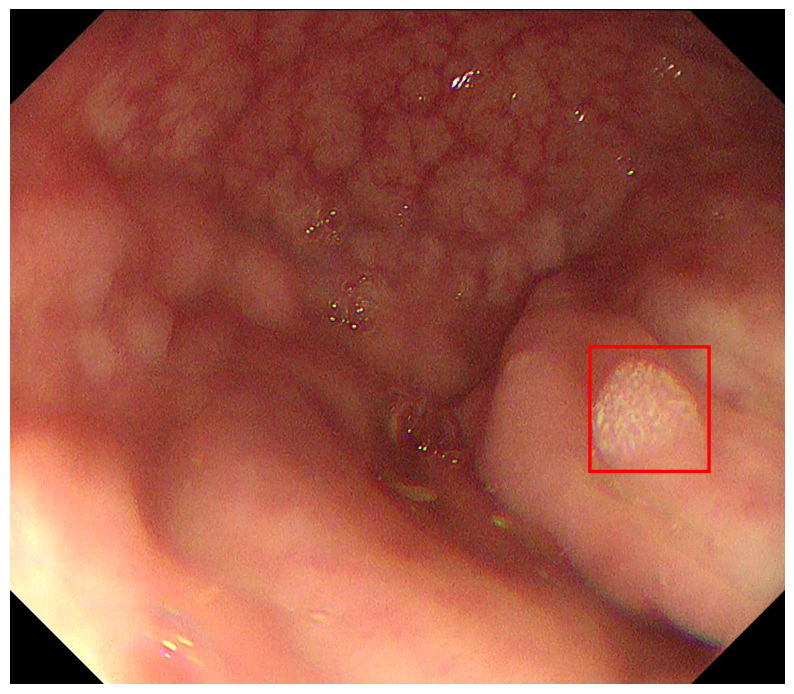

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

img = Image.open("/content/case_M_20181106093315_0U62372110682814_1_007_001-1_a1_ayy_image0004.jpg").convert("RGB")
draw = ImageDraw.Draw(img)

x_min = 864
y_min = 502
x_max = 1046
y_max = 692

draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=5)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis("off")
plt.show()



In [ ]:
!pip install bert_score transformers datasets sacrebleu rouge-score


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.8/100.8 kB 7.6 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=18a56eed57f83335871b8ea04d4b9d1071e3dc8fdadd1546117d3990218ce1c5
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
cases = ["case9_negative", "case7_negative", "case4_negative"]
caption = "This is a colonoscopy frame from a patient with no polyps."
df = pd.DataFrame({
    "case": cases,
    "caption": [caption] * len(cases)
})

output_csv = "negative_cases_captions.csv"
df.to_csv(output_csv, index=False)


In [ ]:
import re
import pandas as pd
from bert_score import score as bert_score
import evaluate

MORPH = ["sessile", "flat", "elevated", "mucosal", "pedunculated", "flat elevated"]
LESIONS = ["polyp", "adenoma", "hyperplastic"]
LOCATIONS = [
    "cecum",
    "rectum",
    "sigmoid colon",
    "descending colon",
    "transverse colon",
    "ascending colon",
    "colon",
]
SIZES = [f"{i} mm" for i in range(1, 21)]

STOP_PHRASES = [
    "a patient with a",
    "patient with a",
    "patient with",
    "a patient",
    "located in the",
    "located in",
    "measuring",
    "mm",
    "polyp",
    "with a",
    "with",
    "a",
]

def clean_caption(text):
    text = text.lower()
    for p in STOP_PHRASES:
        text = text.replace(p, "")
    return " ".join(text.split())

def extract_attr(text, vocab):
    t = text.lower()
    for v in vocab:
        if v in t:
            return v
    return None

def extract_size(text):
    m = re.search(r"(\d+)\s*mm", text.lower())
    return int(m.group(1)) if m else None

def extract_case_from_path(path):
    filename = path.split("/")[-1]
    return filename.split("_img_")[0]

def evaluate_clinical(df):
    out = []
    for _, row in df.iterrows():
        gt = row["gt_caption"]
        pr = row["pred_caption"]
        gt_type = extract_attr(gt, LESIONS)
        pr_type = extract_attr(pr, LESIONS)
        gt_loc = extract_attr(gt, LOCATIONS)
        pr_loc = extract_attr(pr, LOCATIONS)
        gt_morph = extract_attr(gt, MORPH)
        pr_morph = extract_attr(pr, MORPH)
        gt_size = extract_size(gt)
        pr_size = extract_size(pr)
        out.append({
            "case": row["case"],
            "gt_type": gt_type,
            "pr_type": pr_type,
            "type_correct": int(gt_type == pr_type),
            "gt_location": gt_loc,
            "pr_location": pr_loc,
            "location_correct": int(gt_loc == pr_loc),
            "gt_morph": gt_morph,
            "pr_morph": pr_morph,
            "morph_correct": int(gt_morph == pr_morph),
            "gt_size": gt_size,
            "pr_size": pr_size,
            "size_error": abs(gt_size - pr_size) if (gt_size is not None and pr_size is not None) else None
        })
    return pd.DataFrame(out)

def text_metrics(df):
    bleu = evaluate.load("bleu")
    rouge = evaluate.load("rouge")
    gt = df["gt_caption_clean"].tolist()
    pr = df["pred_caption_clean"].tolist()
    bleu_score = bleu.compute(predictions=pr, references=[[g] for g in gt])
    rouge_score = rouge.compute(predictions=pr, references=gt)
    P, R, F1 = bert_score(pr, gt, lang="en", rescale_with_baseline=True)
    print("BLEU-1:", bleu_score["precisions"][0])
    print("BLEU-4:", bleu_score["precisions"][3])
    print("ROUGE-L:", rouge_score["rougeL"])
    print("BERTScore-F1:", F1.mean().item())
    df["bertscore_f1"] = F1.tolist()
    return df

def evaluate_metrics(gt_csv, pred_csv, out_csv="eval_captions_results.csv"):
    df_gt = pd.read_csv(gt_csv).rename(columns={"caption_with_type": "gt_caption"})
    df_pr = pd.read_csv(pred_csv)
    if "case" not in df_pr.columns:
        df_pr["case"] = df_pr["image_path"].apply(extract_case_from_path)
    df_pr = df_pr.rename(columns={"generated_caption": "pred_caption"})
    df = pd.merge(df_gt, df_pr[["case", "pred_caption"]], on="case", how="inner")
    df["gt_caption_clean"] = df["gt_caption"].apply(clean_caption)
    df["pred_caption_clean"] = df["pred_caption"].apply(clean_caption)
    df_clin = evaluate_clinical(df)
    df_text = text_metrics(df)
    df_final = df.join(df_clin.set_index("case"), on="case")
    df_final.to_csv(out_csv, index=False)
    return df_final

evaluate_metrics(
    "/content/drive/MyDrive/captions_with_case_and_type.csv",
    "/content/drive/MyDrive/captions_test_bio_withmal_beam5epochs.csv"
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BLEU-1: 0.552012444098775
BLEU-4: 0.06828501571777855
ROUGE-L: 0.46738657906421066
BERTScore-F1: 0.41395822167396545


,Description,case,polyp_type,gt_caption,pred_caption,gt_caption_clean,pred_caption_clean,bertscore_f1,gt_type,pr_type,type_correct,gt_location,pr_location,location_correct,gt_morph,pr_morph,morph_correct,gt_size,pr_size,size_error
0,A patient with a sessile polyp measuring 18 m...,case2,adenoma,A patient with a sessile adenoma polyp measur...,A patient with a subpedunculated adenoma poly...,sessile denom 18 rectum.,subpedunculted denom 12 sigmoid colon.,0.210222,polyp,polyp,1,rectum,sigmoid colon,0,sessile,pedunculated,0,18,12,6
0,A patient with a sessile polyp measuring 18 m...,case2,adenoma,A patient with a sessile adenoma polyp measur...,A patient with a subpedunculated adenoma poly...,sessile denom 18 rectum.,subpedunculted denom 12 sigmoid colon.,0.210222,polyp,polyp,1,rectum,sigmoid colon,0,sessile,pedunculated,0,18,12,6
0,A patient with a sessile polyp measuring 18 m...,case2,adenoma,A patient with a sessile adenoma polyp measur...,A patient with a subpedunculated adenoma poly...,sessile denom 18 rectum.,subpedunculted denom 12 sigmoid colon.,0.210222,polyp,polyp,1,rectum,descending colon,0,sessile,pedunculated,0,18,12,6
0,A patient with a sessile polyp measuring 18 m...,case2,adenoma,A patient with a sessile adenoma polyp measur...,A patient with a subpedunculated adenoma poly...,sessile denom 18 rectum.,subpedunculted denom 12 sigmoid colon.,0.210222,polyp,polyp,1,rectum,ascending colon,0,sessile,flat,0,18,13,5
0,A patient with a sessile polyp measuring 18 m...,case2,adenoma,A patient with a sessile adenoma polyp measur...,A patient with a subpedunculated adenoma poly...,sessile denom 18 rectum.,subpedunculted denom 12 sigmoid colon.,0.210222,polyp,polyp,1,rectum,ascending colon,0,sessile,flat,0,18,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,A patient with a subpedunculated polyp measur...,case100,hyperplastic,A patient with a subpedunculated hyperplastic...,A patient with a sessile adenoma polyp measur...,subpedunculted hyperplstic 8 sigmoid colon.,sessile denom 4 sigmoid colon.,0.174737,polyp,polyp,1,sigmoid colon,sigmoid colon,1,pedunculated,sessile,0,8,4,4
1519,A patient with a subpedunculated polyp measur...,case100,hyperplastic,A patient with a subpedunculated hyperplastic...,A patient with a sessile adenoma polyp measur...,subpedunculted hyperplstic 8 sigmoid colon.,sessile denom 4 sigmoid colon.,0.174737,polyp,polyp,1,sigmoid colon,descending colon,0,pedunculated,flat,0,8,6,2
1519,A patient with a subpedunculated polyp measur...,case100,hyperplastic,A patient with a subpedunculated hyperplastic...,A patient with a sessile adenoma polyp measur...,subpedunculted hyperplstic 8 sigmoid colon.,sessile denom 4 sigmoid colon.,0.174737,polyp,polyp,1,sigmoid colon,descending colon,0,pedunculated,flat,0,8,6,2
1519,A patient with a subpedunculated polyp measur...,case100,hyperplastic,A patient with a subpedunculated hyperplastic...,A patient with a sessile adenoma polyp measur...,subpedunculted hyperplstic 8 sigmoid colon.,sessile denom 4 sigmoid colon.,0.174737,polyp,polyp,1,sigmoid colon,sigmoid colon,1,pedunculated,sessile,0,8,4,4


In [ ]:
def clinical_stats(df):
    mask_type = df["gt_type"].notna()
    mask_loc = df["gt_location"].notna()
    mask_morph = df["gt_morph"].notna()
    mask_size = df["gt_size"].notna()

    type_acc = df.loc[mask_type, "type_correct"].mean() if mask_type.any() else None
    loc_acc = df.loc[mask_loc, "location_correct"].mean() if mask_loc.any() else None
    morph_acc = df.loc[mask_morph, "morph_correct"].mean() if mask_morph.any() else None

    mask_size_both = df["gt_size"].notna() & df["pr_size"].notna()
    size_mae = df.loc[mask_size_both, "size_error"].mean() if mask_size_both.any() else None

    df["all_clinical_correct"] = (
        (df["type_correct"] == 1)
        & (df["location_correct"] == 1)
        & (df["morph_correct"] == 1)
    )
    full_clinical_acc = df["all_clinical_correct"].mean()

    print("Type accuracy:", type_acc)
    print("Location accuracy:", loc_acc)
    print("Morphology accuracy:", morph_acc)
    print("Size MAE (mm):", size_mae)
    print("All clinical attributes correct:", full_clinical_acc)

    return df

df_res = evaluate_metrics(
    "/content/drive/MyDrive/captions_with_case_and_type.csv",
    "/content/drive/MyDrive/captions_test_bio_withmal_beam5epochs.csv"
)

df_res = clinical_stats(df_res)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BLEU-1: 0.552012444098775
BLEU-4: 0.06828501571777855
ROUGE-L: 0.46738657906421066
BERTScore-F1: 0.41395822167396545
Type accuracy: 1.0
Location accuracy: 0.2394736842105263
Morphology accuracy: 0.4125
Size MAE (mm): 4.594736842105263
All clinical attributes correct: 0.10394736842105264


In [ ]:
def token_overlap_metrics(df):
    precs = []
    recs = []
    f1s = []

    for _, row in df.iterrows():
        gt_tokens = row["gt_caption_clean"].split()
        pr_tokens = row["pred_caption_clean"].split()

        gt_set = set(gt_tokens)
        pr_set = set(pr_tokens)

        if len(pr_set) == 0 or len(gt_set) == 0:
            precs.append(0.0)
            recs.append(0.0)
            f1s.append(0.0)
            continue

        inter = len(gt_set & pr_set)

        p = inter / len(pr_set)
        r = inter / len(gt_set)
        f1 = 2 * p * r / (p + r) if (p + r) > 0 else 0.0

        precs.append(p)
        recs.append(r)
        f1s.append(f1)

    df["token_precision"] = precs
    df["token_recall"] = recs
    df["token_f1"] = f1s

    print("Token-level precision (mean):", df["token_precision"].mean())
    print("Token-level recall (mean):", df["token_recall"].mean())
    print("Token-level F1 (mean):", df["token_f1"].mean())

    return df

df_res = evaluate_metrics(
    "/content/drive/MyDrive/captions_with_case_and_type.csv",
    "/content/drive/MyDrive/captions_test_bio_withmal_beam5epochs.csv"
)

df_res = clinical_stats(df_res)
df_res = token_overlap_metrics(df_res)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BLEU-1: 0.552012444098775
BLEU-4: 0.06828501571777855
ROUGE-L: 0.4672875114651422
BERTScore-F1: 0.41395825147628784
Type accuracy: 1.0
Location accuracy: 0.2394736842105263
Morphology accuracy: 0.4125
Size MAE (mm): 4.594736842105263
All clinical attributes correct: 0.10394736842105264
Token-level precision (mean): 0.4701237468671679
Token-level recall (mean): 0.4730889724310777
Token-level F1 (mean): 0.46727643701327914


In [ ]:
import re
import pandas as pd
from bert_score import score as bert_score
import evaluate

MORPH = ["sessile", "flat", "elevated", "mucosal", "pedunculated", "flat elevated"]
LESIONS = ["polyp", "adenoma", "hyperplastic"]
LOCATIONS = [
    "cecum",
    "rectum",
    "sigmoid colon",
    "descending colon",
    "transverse colon",
    "ascending colon",
    "colon",
]
SIZES = [f"{i} mm" for i in range(1, 21)]

STOP_PHRASES = [
    "this is a colonoscopy frame from a",
    "a patient with a",
    "patient with a",
    "patient with",
    "a patient",
]

def clean_caption(text):
    text = text.lower()
    for p in STOP_PHRASES:
        text = text.replace(p, "")
    return " ".join(text.split())

def extract_attr(text, vocab):
    t = text.lower()
    for v in vocab:
        if v in t:
            return v
    return None

def extract_lesion(text):
    t = text.lower()
    if "no polyps" in t:
        return None
    for v in LESIONS:
        pattern = rf"\b{re.escape(v)}s?\b"
        if re.search(pattern, t):
            return v
    return None

def extract_size(text):
    m = re.search(r"(\d+)\s*mm", text.lower())
    return int(m.group(1)) if m else None

def extract_case_from_path(path):
    filename = path.split("/")[-1]
    return filename.split("_img_")[0]

def evaluate_clinical(df):
    out = []
    for _, row in df.iterrows():
        gt = row["gt_caption"]
        pr = row["pred_caption"]
        gt_type = extract_lesion(gt)
        pr_type = extract_lesion(pr)
        gt_loc = extract_attr(gt, LOCATIONS)
        pr_loc = extract_attr(pr, LOCATIONS)
        gt_morph = extract_attr(gt, MORPH)
        pr_morph = extract_attr(pr, MORPH)
        gt_size = extract_size(gt)
        pr_size = extract_size(pr)
        out.append({
            "case": row["case"],
            "gt_type": gt_type,
            "pr_type": pr_type,
            "type_correct": int(gt_type == pr_type) if gt_type is not None else None,
            "gt_location": gt_loc,
            "pr_location": pr_loc,
            "location_correct": int(gt_loc == pr_loc) if gt_loc is not None else None,
            "gt_morph": gt_morph,
            "pr_morph": pr_morph,
            "morph_correct": int(gt_morph == pr_morph) if gt_morph is not None else None,
            "gt_size": gt_size,
            "pr_size": pr_size,
            "size_error": abs(gt_size - pr_size) if (gt_size is not None and pr_size is not None) else None
        })
    return pd.DataFrame(out)

def text_metrics(df):
    bleu = evaluate.load("bleu")
    rouge = evaluate.load("rouge")
    gt = df["gt_caption_clean"].tolist()
    pr = df["pred_caption_clean"].tolist()
    bleu_score = bleu.compute(predictions=pr, references=[[g] for g in gt])
    rouge_score = rouge.compute(predictions=pr, references=gt)
    P, R, F1 = bert_score(pr, gt, lang="en", rescale_with_baseline=True)
    print("BLEU-1:", bleu_score["precisions"][0])
    print("BLEU-4:", bleu_score["precisions"][3])
    print("ROUGE-L:", rouge_score["rougeL"])
    print("BERTScore-F1:", F1.mean().item())
    df["bertscore_f1"] = F1.tolist()
    return df

def evaluate_metrics(gt_pos_csv, gt_neg_csv, pred_csv, out_csv="eval_captions_results.csv"):
    df_gt_pos = pd.read_csv(gt_pos_csv).rename(columns={"caption_with_type": "gt_caption"})
    df_gt_neg = pd.read_csv(gt_neg_csv).rename(columns={"caption": "gt_caption"})
    df_gt_pos = df_gt_pos[["case", "gt_caption"]]
    df_gt_neg = df_gt_neg[["case", "gt_caption"]]
    df_gt = pd.concat([df_gt_pos, df_gt_neg], ignore_index=True)
    df_pr = pd.read_csv(pred_csv)
    if "case" not in df_pr.columns:
        df_pr["case"] = df_pr["image_path"].apply(extract_case_from_path)
    if "generated_caption" in df_pr.columns:
        df_pr = df_pr.rename(columns={"generated_caption": "pred_caption"})
    df = pd.merge(df_gt, df_pr[["case", "pred_caption"]], on="case", how="inner")
    df["gt_caption_clean"] = df["gt_caption"].apply(clean_caption)
    df["pred_caption_clean"] = df["pred_caption"].apply(clean_caption)
    df_clin = evaluate_clinical(df)
    df = text_metrics(df)
    df_final = df.join(df_clin.set_index("case"), on="case")
    df_final.to_csv(out_csv, index=False)
    return df_final

def clinical_stats(df):
    mask_type = df["gt_type"].notna()
    mask_loc = df["gt_location"].notna()
    mask_morph = df["gt_morph"].notna()
    mask_size = df["gt_size"].notna()
    type_acc = df.loc[mask_type, "type_correct"].mean() if mask_type.any() else None
    loc_acc = df.loc[mask_loc, "location_correct"].mean() if mask_loc.any() else None
    morph_acc = df.loc[mask_morph, "morph_correct"].mean() if mask_morph.any() else None
    mask_size_both = df["gt_size"].notna() & df["pr_size"].notna()
    size_mae = df.loc[mask_size_both, "size_error"].mean() if mask_size_both.any() else None
    df["all_clinical_correct"] = (
        (df["type_correct"] == 1)
        & (df["location_correct"] == 1)
        & (df["morph_correct"] == 1)
    )
    mask_valid = df["gt_type"].notna() | df["gt_location"].notna() | df["gt_morph"].notna() | df["gt_size"].notna()
    full_clinical_acc = df.loc[mask_valid, "all_clinical_correct"].mean() if mask_valid.any() else None
    print("Type accuracy:", type_acc)
    print("Location accuracy:", loc_acc)
    print("Morphology accuracy:", morph_acc)
    print("Size MAE (mm):", size_mae)
    print("All clinical attributes correct:", full_clinical_acc)
    return df

def token_overlap_metrics(df):
    precs = []
    recs = []
    f1s = []
    for _, row in df.iterrows():
        gt_tokens = row["gt_caption_clean"].split()
        pr_tokens = row["pred_caption_clean"].split()
        gt_set = set(gt_tokens)
        pr_set = set(pr_tokens)
        if len(pr_set) == 0 or len(gt_set) == 0:
            precs.append(0.0)
            recs.append(0.0)
            f1s.append(0.0)
            continue
        inter = len(gt_set & pr_set)
        p = inter / len(pr_set)
        r = inter / len(gt_set)
        f1 = 2 * p * r / (p + r) if (p + r) > 0 else 0.0
        precs.append(p)
        recs.append(r)
        f1s.append(f1)
    df["token_precision"] = precs
    df["token_recall"] = recs
    df["token_f1"] = f1s
    print("Token-level precision (mean):", df["token_precision"].mean())
    print("Token-level recall (mean):", df["token_recall"].mean())
    print("Token-level F1 (mean):", df["token_f1"].mean())
    return df

df_res = evaluate_metrics(
    "/content/drive/MyDrive/captions_with_case_and_type.csv",
    "/content/negative_cases_captions.csv",
    "/content/drive/MyDrive/captions_test_bio_join_beam10epochs.csv"
)

df_res = clinical_stats(df_res)
df_res = token_overlap_metrics(df_res)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BLEU-1: 0.6713167131671317
BLEU-4: 0.2316440238131583
ROUGE-L: 0.6669252372156418
BERTScore-F1: 0.73692786693573
Type accuracy: 0.7039473684210527
Location accuracy: 0.735430008942524
Morphology accuracy: 0.3171052631578947
Size MAE (mm): 4.067289719626168
All clinical attributes correct: 0.0063500952965937114
Token-level precision (mean): 0.7879901693718797
Token-level recall (mean): 0.7836965854503137
Token-level F1 (mean): 0.7855963839478668


In [ ]:
import pandas as pd

def extract_case(path):
    name = path.split("/")[-1]
    return name.split("_img_")[0]

df = pd.read_csv("/content/drive/MyDrive/captions_test_bio_join_beam10epochs.csv")
df["case"] = df["image_path"].apply(extract_case)
df.to_csv("/content/drive/MyDrive/captions_test_bio_join_beam10epochs_withcase.csv", index=False)

print("CSV generado: predicciones_con_case.csv")


CSV generado: predicciones_con_case.csv


In [ ]:
import pandas as pd

NEG_CAPTION = "this is a colonoscopy frame from a patient with no polyps."

def norm(t):
    return str(t).strip().lower()

def compute_binary_image_metrics(gt_pos_csv, gt_neg_csv, pred_csv):
    df_gt_pos = pd.read_csv(gt_pos_csv).rename(columns={"caption_with_type": "gt_caption"})
    df_gt_neg = pd.read_csv(gt_neg_csv).rename(columns={"caption": "gt_caption"})
    df_gt_pos = df_gt_pos[["case", "gt_caption"]]
    df_gt_neg = df_gt_neg[["case", "gt_caption"]]
    df_gt = pd.concat([df_gt_pos, df_gt_neg], ignore_index=True)

    df_gt["gt_is_neg"] = df_gt["gt_caption"].apply(lambda x: norm(x) == NEG_CAPTION)
    df_gt["gt_label"] = df_gt["gt_is_neg"].apply(lambda x: 0 if x else 1)

    df_pr = pd.read_csv(pred_csv)

    if "case" not in df_pr.columns:
        df_pr["case"] = df_pr["image_path"].apply(lambda p: p.split("/")[-1].split("_img_")[0])
    if "generated_caption" in df_pr.columns:
        df_pr = df_pr.rename(columns={"generated_caption": "pred_caption"})

    df = pd.merge(df_pr, df_gt[["case", "gt_caption", "gt_label"]], on="case", how="inner")

    df["pr_is_neg"] = df["pred_caption"].apply(lambda x: norm(x) == NEG_CAPTION)
    df["pr_label"] = df["pr_is_neg"].apply(lambda x: 0 if x else 1)

    tp = ((df["gt_label"] == 1) & (df["pr_label"] == 1)).sum()
    tn = ((df["gt_label"] == 0) & (df["pr_label"] == 0)).sum()
    fp = ((df["gt_label"] == 0) & (df["pr_label"] == 1)).sum()
    fn = ((df["gt_label"] == 1) & (df["pr_label"] == 0)).sum()

    total = len(df)
    accuracy = (tp + tn) / total if total else 0
    precision = tp / (tp + fp) if (tp + fp) else 0
    recall = tp / (tp + fn) if (tp + fn) else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0
    specificity = tn / (tn + fp) if (tn + fp) else 0

    print("Total imágenes evaluadas:", total)
    print("Total pacientes en predicción:", df['case'].nunique())
    print("TP:", tp)
    print("TN:", tn)
    print("FP:", fp)
    print("FN:", fn)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)
    print("Specificity:", specificity)

compute_binary_image_metrics(
    "/content/drive/MyDrive/captions_with_case_and_type.csv",
    "/content/negative_cases_captions.csv",
    "/content/drive/MyDrive/captions_RN101_final_14epochs.csv"
)


Total imágenes evaluadas: 3040
Total pacientes en predicción: 23
TP: 1079
TN: 1308
FP: 212
FN: 441
Accuracy: 0.7851973684210526
Precision: 0.8357862122385747
Recall: 0.7098684210526316
F1: 0.767698327997154
Specificity: 0.8605263157894737


In [ ]:
import re
import pandas as pd
from bert_score import score as bert_score
import evaluate

MORPH = ["sessile", "flat", "elevated", "mucosal", "pedunculated", "flat elevated", "subpedunculated"]
LESIONS = ["polyp", "adenoma", "hyperplastic"]
LOCATIONS = [
    "cecum",
    "rectum",
    "sigmoid colon",
    "descending colon",
    "transverse colon",
    "ascending colon",
    "colon",
]

STOP_PHRASES = [
    "this is a colonoscopy frame from a",
    "a patient with a",
    "patient with a",
    "patient with",
    "a patient",
]

def clean_caption(text: str) -> str:
    text = str(text).lower()
    for p in STOP_PHRASES:
        text = text.replace(p, "")
    return " ".join(text.split())

def extract_attr(text: str, vocab):
    t = str(text).lower()
    for v in vocab:
        if v in t:
            return v
    return None

def extract_lesion(text: str):
    t = str(text).lower()
    if "no polyps" in t:
        return None
    for v in LESIONS:
        pattern = rf"\b{re.escape(v)}s?\b"
        if re.search(pattern, t):
            return v
    return None

def extract_size(text: str):
    m = re.search(r"(\d+)\s*mm", str(text).lower())
    return int(m.group(1)) if m else None

def extract_case_from_path(path: str):
    filename = str(path).split("/")[-1]
    return filename.split("_img_")[0]

def evaluate_clinical(df: pd.DataFrame) -> pd.DataFrame:
    """
    Evaluate clinical attributes row-by-row to preserve per-frame correctness.
    """
    out = []
    for _, row in df.iterrows():
        gt = row["gt_caption"]
        pr = row["pred_caption"]

        gt_type = extract_lesion(gt)
        pr_type = extract_lesion(pr)

        gt_loc = extract_attr(gt, LOCATIONS)
        pr_loc = extract_attr(pr, LOCATIONS)

        gt_morph = extract_attr(gt, MORPH)
        pr_morph = extract_attr(pr, MORPH)

        gt_size = extract_size(gt)
        pr_size = extract_size(pr)

        out.append({
            "gt_type": gt_type,
            "pr_type": pr_type,
            "type_correct": int(gt_type == pr_type) if gt_type is not None else None,

            "gt_location": gt_loc,
            "pr_location": pr_loc,
            "location_correct": int(gt_loc == pr_loc) if gt_loc is not None else None,

            "gt_morph": gt_morph,
            "pr_morph": pr_morph,
            "morph_correct": int(gt_morph == pr_morph) if gt_morph is not None else None,

            "gt_size": gt_size,
            "pr_size": pr_size,
            "size_error": abs(gt_size - pr_size) if (gt_size is not None and pr_size is not None) else None,
        })

    return pd.DataFrame(out)

def text_metrics(df: pd.DataFrame) -> pd.DataFrame:
    bleu = evaluate.load("bleu")
    rouge = evaluate.load("rouge")

    gt = df["gt_caption_clean"].tolist()
    pr = df["pred_caption_clean"].tolist()

    bleu_score = bleu.compute(predictions=pr, references=[[g] for g in gt])
    rouge_score = rouge.compute(predictions=pr, references=gt)

    P, R, F1 = bert_score(pr, gt, lang="en", rescale_with_baseline=True)

    print("BLEU-1:", bleu_score["precisions"][0])
    print("BLEU-4:", bleu_score["precisions"][3])
    print("ROUGE-L:", rouge_score["rougeL"])
    print("BERTScore-F1:", F1.mean().item())

    df["bertscore_f1"] = F1.tolist()
    return df

def evaluate_metrics(
    gt_pos_csv: str,
    gt_neg_csv: str,
    pred_csv: str,
    out_csv: str = "eval_captions_results.csv",
) -> pd.DataFrame:

    df_gt_pos = pd.read_csv(gt_pos_csv).rename(columns={"caption_with_type": "gt_caption"})
    df_gt_neg = pd.read_csv(gt_neg_csv).rename(columns={"caption": "gt_caption"})
    df_gt_pos = df_gt_pos[["case", "gt_caption"]]
    df_gt_neg = df_gt_neg[["case", "gt_caption"]]
    df_gt = pd.concat([df_gt_pos, df_gt_neg], ignore_index=True)
    df_pr = pd.read_csv(pred_csv)

    if "case" not in df_pr.columns:
        df_pr["case"] = df_pr["image_path"].apply(extract_case_from_path)

    if "generated_caption" in df_pr.columns:
        df_pr = df_pr.rename(columns={"generated_caption": "pred_caption"})

    needed_cols = ["case", "image_path", "pred_caption"]
    missing = [c for c in needed_cols if c not in df_pr.columns]
    if missing:
        raise ValueError(f"Prediction CSV is missing columns: {missing}")

    df = pd.merge(df_pr[needed_cols], df_gt, on="case", how="inner")
    df["gt_caption_clean"] = df["gt_caption"].apply(clean_caption)
    df["pred_caption_clean"] = df["pred_caption"].apply(clean_caption)
    df_clin = evaluate_clinical(df)
    df = text_metrics(df)
    df_final = pd.concat([df.reset_index(drop=True), df_clin.reset_index(drop=True)], axis=1)
    df_final.to_csv(out_csv, index=False)
    return df_final

def clinical_stats(df: pd.DataFrame) -> pd.DataFrame:
    mask_type = df["gt_type"].notna()
    mask_loc = df["gt_location"].notna()
    mask_morph = df["gt_morph"].notna()
    mask_size_both = df["gt_size"].notna() & df["pr_size"].notna()

    type_acc = df.loc[mask_type, "type_correct"].mean() if mask_type.any() else None
    loc_acc = df.loc[mask_loc, "location_correct"].mean() if mask_loc.any() else None
    morph_acc = df.loc[mask_morph, "morph_correct"].mean() if mask_morph.any() else None
    size_mae = df.loc[mask_size_both, "size_error"].mean() if mask_size_both.any() else None

    df["all_clinical_correct"] = (
        (df["type_correct"] == 1) &
        (df["location_correct"] == 1) &
        (df["morph_correct"] == 1)
    )

    df["all_clinical_correct_with_size"] = df["all_clinical_correct"] & (df["size_error"] == 0)
    full_clin_acc = df["all_clinical_correct"].mean()
    full_clin_acc_size = df["all_clinical_correct_with_size"].mean()
    print("Type accuracy:", type_acc)
    print("Location accuracy:", loc_acc)
    print("Morphology accuracy:", morph_acc)
    print("Size MAE (mm):", size_mae)
    print("All clinical attributes correct (type+loc+morph):", full_clin_acc)
    print("All clinical attributes correct (type+loc+morph+size exact):", full_clin_acc_size)
    return df

def token_overlap_metrics(df: pd.DataFrame) -> pd.DataFrame:
    precs, recs, f1s = [], [], []

    for _, row in df.iterrows():
        gt_tokens = str(row["gt_caption_clean"]).split()
        pr_tokens = str(row["pred_caption_clean"]).split()
        gt_set = set(gt_tokens)
        pr_set = set(pr_tokens)

        if len(pr_set) == 0 or len(gt_set) == 0:
            precs.append(0.0)
            recs.append(0.0)
            f1s.append(0.0)
            continue

        inter = len(gt_set & pr_set)
        p = inter / len(pr_set)
        r = inter / len(gt_set)
        f1 = 2 * p * r / (p + r) if (p + r) > 0 else 0.0

        precs.append(p)
        recs.append(r)
        f1s.append(f1)

    df["token_precision"] = precs
    df["token_recall"] = recs
    df["token_f1"] = f1s

    print("Token-level precision (mean):", df["token_precision"].mean())
    print("Token-level recall (mean):", df["token_recall"].mean())
    print("Token-level F1 (mean):", df["token_f1"].mean())
    return df

def print_matching_image_paths(df: pd.DataFrame, top_k: int = None):
    exact = df[df["gt_caption_clean"] == df["pred_caption_clean"]]
    exact_paths = exact["image_path"].tolist()
    clin = df[df["all_clinical_correct"] == True]
    clin_paths = clin["image_path"].tolist()
    clin_size = df[df["all_clinical_correct_with_size"] == True]
    clin_size_paths = clin_size["image_path"].tolist()

    if top_k is not None:
        exact_paths = exact_paths[:top_k]
        clin_paths = clin_paths[:top_k]
        clin_size_paths = clin_size_paths[:top_k]

    print("\n=== EXACT caption match (gt == pred, cleaned) ===")
    print(exact_paths)

    print("\n=== FULL clinical match (type + location + morphology) ===")
    print(clin_paths)

    print("\n=== FULL clinical match (type + location + morphology + size exact) ===")
    print(clin_size_paths)

    return exact_paths, clin_paths, clin_size_paths

df_res = evaluate_metrics(
    "/content/drive/MyDrive/captions_with_case_and_type.csv",
    "/content/negative_cases_captions.csv",
    "/content/drive/MyDrive/captions_test_bio_join_beam15epochs.csv",
    out_csv="eval_captions_results.csv"
)

df_res = clinical_stats(df_res)
df_res = token_overlap_metrics(df_res)
exact_paths, clin_paths, clin_size_paths = print_matching_image_paths(df_res, top_k=None)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BLEU-1: 0.6975113915177007
BLEU-4: 0.2570270021196203
ROUGE-L: 0.6607679440865961
BERTScore-F1: 0.731612503528595
Saved: eval_captions_results.csv
Type accuracy: 0.6151315789473685
Location accuracy: 0.4986842105263158
Morphology accuracy: 0.31842105263157894
Size MAE (mm): 3.690909090909091
All clinical attributes correct (type+loc+morph): 0.025657894736842105
All clinical attributes correct (type+loc+morph+size exact): 0.0042763157894736845
Token-level precision (mean): 0.6709996089436879
Token-level recall (mean): 0.6524674886516991
Token-level F1 (mean): 0.6608674987081737

=== EXACT caption match (gt == pred, cleaned) ===
['/data/jefelitman_pupils/Sun_Multimodal/Test_join/case4_negative_img_00054.jpg', '/data/jefelitman_pupils/Sun_Multimodal/Test_join/case4_negative_img_00107.jpg', '/data/jefelitman_pupils/Sun_Multimodal/Test_join/case4_negative_img_00118.jpg', '/data/jefelitman_pupils/Sun_Multimodal/Test_join/case4_negative_img_00129.jpg', '/data/jefelitman_pupils/Sun_Multimodal/